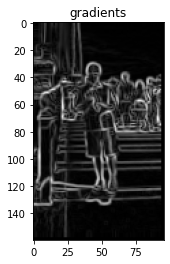

In [28]:
#Image gradient computation
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#Reading the image files
image = np.array(Image.open('/Users/sriramvuppala/Downloads/HumanDetection/Testpos/crop001070a.bmp')).astype(np.uint8) # keep changing the file name to get the required outputs

#Converting images into grayscale
gray_image = np.round(0.299 * image[:, :, 0] +
                    0.587 * image[:, :, 1] +
                    0.114 * image[:, :, 2]).astype(np.uint8)

#Implementing the Prewitt Operator
hi, wi= gray_image.shape
hz = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vt = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

#Here we initialize the gradient images with zeroes
newgradientImage = np.zeros((hi, wi))

#Here we initialize the offset as 1
for i in range(1, hi - 1):
    for j in range(1, wi - 1):
        hzGrad = (hz[0, 0] * gray_image[i - 1, j - 1]) + \
                         (hz[0, 1] * gray_image[i - 1, j]) + \
                         (hz[0, 2] * gray_image[i - 1, j + 1]) + \
                         (hz[1, 0] * gray_image[i, j - 1]) + \
                         (hz[1, 1] * gray_image[i, j]) + \
                         (hz[1, 2] * gray_image[i, j + 1]) + \
                         (hz[2, 0] * gray_image[i + 1, j - 1]) + \
                         (hz[2, 1] * gray_image[i + 1, j]) + \
                         (hz[2, 2] * gray_image[i + 1, j + 1])

        vtGrad = (vt[0, 0] * gray_image[i - 1, j - 1]) + \
                       (vt[0, 1] * gray_image[i - 1, j]) + \
                       (vt[0, 2] * gray_image[i - 1, j + 1]) + \
                       (vt[1, 0] * gray_image[i, j - 1]) + \
                       (vt[1, 1] * gray_image[i, j]) + \
                       (vt[1, 2] * gray_image[i, j + 1]) + \
                       (vt[2, 0] * gray_image[i + 1, j - 1]) + \
                       (vt[2, 1] * gray_image[i + 1, j]) + \
                       (vt[2, 2] * gray_image[i + 1, j + 1])

        #Computing edge weights
        magnitude = np.sqrt(pow(hzGrad, 2.0) + pow(vtGrad, 2.0))
        newgradientImage[i - 1, j - 1] = magnitude


plt.figure()
plt.title('gradients')
plt.imsave('gradients.bmp', newgradientImage, cmap='gray', format='bmp')
plt.imshow(newgradientImage, cmap='gray')
plt.show()

In [2]:
#Importing libraries
import cv2
import numpy as np
import math
import random
from numpy  import array
from numpy import zeros
import glob

def hog(image_name):
	
	image_in = cv2.imread(image_name,cv2.IMREAD_COLOR) 
	hi, wi = image_in.shape[:2]
	
	n_image_in = []
	for i in range(0,hi):
		n_image_in.append([])
	for i in range(0,hi):
		for j in range(0,wi):
			n_image_in[i].append(round(0.299*image_in[i][j][2]+0.587*image_in[i][j][1]+0.114*image_in[i][j][0]))

	a = np.array(n_image_in, dtype=np.uint8)
	n_hi, n_wi = a.shape[:2]


	X = []
	for i in range(0,n_hi-2):
		X.append([])
	for i in range(0,n_hi-2):
		for j in range(0,n_wi-2):
			#Normalization is performed here for the X vector.
			X[i].append((-n_image_in[i][j]+n_image_in[i][j+2]-n_image_in[i+1][j]+n_image_in[i+1][j+2]-n_image_in[i+2][j]+n_image_in[i+2][j+2])/3)
	b = np.array(X, dtype=np.uint8)
	
	
	#Horizontal edges is computed here using Prewitt’s Operator
	Y = []
	for i in range(0,n_hi-2):
		Y.append([])

	for i in range(0,n_hi-2):
		for j in range(0,n_wi-2):
			#Normalization is done here for the Y vector.
			Y[i].append((n_image_in[i][j]+n_image_in[i][j+1]+n_image_in[i][j+2]-n_image_in[i+2][j]-n_image_in[i+2][j+1]-n_image_in[i+2][j+2])/3)
	c = np.array(Y, dtype=np.uint8)

	
	#magnitude of image is computed
	mag_image = []
	for i in range(0,n_hi-2):
		mag_image.append([])

	#gradient angle is computed
	ang_grd = [] 
	for i in range(0,n_hi-2):
		ang_grd.append([])

	for i in range(0,n_hi-2):
		for j in range(0,n_wi-2):
			mag_image[i].append(np.sqrt((X[i][j]*X[i][j])+(Y[i][j]*Y[i][j]))/np.sqrt(2))
			
			if(X[i][j]== 0):
				if(Y[i][j]>0):
					ang_grd[i].append(90)
				elif(Y[i][j]<0):
					ang_grd[i].append(-90+180)
				else:
					ang_grd[i].append(0)
			else:
				angle = math.degrees(np.arctan((Y[i][j]/X[i][j])))
				if(angle<0):
					ang_grd[i].append(angle+180)
				else:
					ang_grd[i].append(angle)
			if(ang_grd[i][j] == -0.0):
				ang_grd[i][j] = 0.0
			if(ang_grd[i][j] > 180):
				print(ang_grd[i][j])
	d = np.array(mag_image, dtype=np.uint8)
	# Creating lists for storing hog values
	HOG_vector = []
	HOG1 = []
	HOG2 = []
	HOG3 = []
	HOG4 = []
	HOGG = [0,0,0,0,0,0,0,0,0]

	mag_image = np.pad(mag_image, ((1,1),(1,1)), 'constant')
	ang_grd = np.pad(ang_grd, ((1,1),(1,1)), 'constant')



	diff = (n_hi)%8
	n_h=(n_hi)-diff

	diff = (n_wi)%8
	n_w=(n_wi)-diff

    #Computing Blocks
	for i in range(0,n_h-15,8):
		for j in range(0,n_w-15,8):

		    # Top left Cell Computation within block
			for k in range(i,i+8):
				for l in range(j,j+8):
					#Computing Bin 
					if(ang_grd[k][l] <= 0):
						Rdist = 0 - ang_grd[k][l]
						Ldist = 10 + (10 + ang_grd[k][l])
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 160):
						Rdist = 10 + (170 - ang_grd[k][l])
						Ldist = ang_grd[k][l] - 160
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 0 and ang_grd[k][l] <= 20):
						Ldist = ang_grd[k][l] - 0
						Rdist = 20 - ang_grd[k][l]
						HOGG[1] = HOGG[1]+((Ldist/20) * mag_image[k][l])
						HOGG[0] = HOGG[0]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 20 and ang_grd[k][l] <= 40):
						Ldist = ang_grd[k][l] - 20
						Rdist = 40 - ang_grd[k][l]
						HOGG[2] = HOGG[2]+((Ldist/20) * mag_image[k][l])
						HOGG[1] = HOGG[1]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 40 and ang_grd[k][l] <= 60):
						Ldist = ang_grd[k][l] - 40
						Rdist = 60 - ang_grd[k][l]
						HOGG[3] = HOGG[3]+((Ldist/20) * mag_image[k][l])
						HOGG[2] = HOGG[2]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 60 and ang_grd[k][l] <= 80):
						Ldist = ang_grd[k][l] - 60
						Rdist = 80 - ang_grd[k][l]
						HOGG[4] = HOGG[4]+((Ldist/20) * mag_image[k][l])
						HOGG[3] = HOGG[3]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 80 and ang_grd[k][l] <= 100):
						Ldist = ang_grd[k][l] - 80
						Rdist = 100 - ang_grd[k][l]
						HOGG[5] = HOGG[5]+((Ldist/20) * mag_image[k][l])
						HOGG[4] = HOGG[4]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 100 and ang_grd[k][l] <= 120):
						Ldist = ang_grd[k][l] - 100
						Rdist = 120 - ang_grd[k][l]
						HOGG[6] = HOGG[6]+((Ldist/20) * mag_image[k][l])
						HOGG[5] = HOGG[5]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 120 and ang_grd[k][l] <= 140):
						Ldist = ang_grd[k][l] - 120
						Rdist = 140 - ang_grd[k][l]
						HOGG[7] = HOGG[7]+((Ldist/20) * mag_image[k][l])
						HOGG[6] = HOGG[6]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 140 and ang_grd[k][l] <= 160):
						Ldist = ang_grd[k][l] - 140
						Rdist = 160 - ang_grd[k][l]
						HOGG[8] = HOGG[8]+((Ldist/20) * mag_image[k][l])
						HOGG[7] = HOGG[7]+((Rdist/20) * mag_image[k][l])
			#reinitializing values to 0
			HOGG1 = HOGG
			HOGG = [0,0,0,0,0,0,0,0,0]

            # Top right Cell Computation within block
			for k in range(i,i+8):
				for l in range(j+8,j+16):

					if(ang_grd[k][l] <= 0):
						Rdist = 0 - ang_grd[k][l]
						Ldist = 10 + (10 + ang_grd[k][l])
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 160):
						Rdist = 10 + (170 - ang_grd[k][l])
						Ldist = ang_grd[k][l] - 160
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 0 and ang_grd[k][l] <= 20):
						Ldist = ang_grd[k][l] - 0
						Rdist = 20 - ang_grd[k][l]
						HOGG[1] = HOGG[1]+((Ldist/20) * mag_image[k][l])
						HOGG[0] = HOGG[0]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 20 and ang_grd[k][l] <= 40):
						Ldist = ang_grd[k][l] - 20
						Rdist = 40 - ang_grd[k][l]
						HOGG[2] = HOGG[2]+((Ldist/20) * mag_image[k][l])
						HOGG[1] = HOGG[1]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 40 and ang_grd[k][l] <= 60):
						Ldist = ang_grd[k][l] - 40
						Rdist = 60 - ang_grd[k][l]
						HOGG[3] = HOGG[3]+((Ldist/20) * mag_image[k][l])
						HOGG[2] = HOGG[2]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 60 and ang_grd[k][l] <= 80):
						Ldist = ang_grd[k][l] - 60
						Rdist = 80 - ang_grd[k][l]
						HOGG[4] = HOGG[4]+((Ldist/20) * mag_image[k][l])
						HOGG[3] = HOGG[3]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 80 and ang_grd[k][l] <= 100):
						Ldist = ang_grd[k][l] - 80
						Rdist = 100 - ang_grd[k][l]
						HOGG[5] = HOGG[5]+((Ldist/20) * mag_image[k][l])
						HOGG[4] = HOGG[4]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 100 and ang_grd[k][l] <= 120):
						Ldist = ang_grd[k][l] - 100
						Rdist = 120 - ang_grd[k][l]
						HOGG[6] = HOGG[6]+((Ldist/20) * mag_image[k][l])
						HOGG[5] = HOGG[5]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 120 and ang_grd[k][l] <= 140):
						Ldist = ang_grd[k][l] - 120
						Rdist = 140 - ang_grd[k][l]
						HOGG[7] = HOGG[7]+((Ldist/20) * mag_image[k][l])
						HOGG[6] = HOGG[6]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 140 and ang_grd[k][l] <= 160):
						Ldist = ang_grd[k][l] - 140
						Rdist = 160 - ang_grd[k][l]
						HOGG[8] = HOGG[8]+((Ldist/20) * mag_image[k][l])
						HOGG[7] = HOGG[7]+((Rdist/20) * mag_image[k][l])
			#reinitializing values again 
			HOGG2 = HOGG
			HOGG = [0,0,0,0,0,0,0,0,0]
					
             # Computing Bottom left Cell values within Block
			for k in range(i+8,i+16):
				for l in range(j,j+8):
					
					if(ang_grd[k][l] <= 0):
						Rdist = 0 - ang_grd[k][l]
						Ldist = 10 + (10 + ang_grd[k][l])
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 160):
						Rdist = 10 + (170 - ang_grd[k][l])
						Ldist = ang_grd[k][l] - 160
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 0 and ang_grd[k][l] <= 20):
						Ldist = ang_grd[k][l] - 0
						Rdist = 20 - ang_grd[k][l]
						HOGG[1] = HOGG[1]+((Ldist/20) * mag_image[k][l])
						HOGG[0] = HOGG[0]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 20 and ang_grd[k][l] <= 40):
						Ldist = ang_grd[k][l] - 20
						Rdist = 40 - ang_grd[k][l]
						HOGG[2] = HOGG[2]+((Ldist/20) * mag_image[k][l])
						HOGG[1] = HOGG[1]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 40 and ang_grd[k][l] <= 60):
						Ldist = ang_grd[k][l] - 40
						Rdist = 60 - ang_grd[k][l]
						HOGG[3] = HOGG[3]+((Ldist/20) * mag_image[k][l])
						HOGG[2] = HOGG[2]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 60 and ang_grd[k][l] <= 80):
						Ldist = ang_grd[k][l] - 60
						Rdist = 80 - ang_grd[k][l]
						HOGG[4] = HOGG[4]+((Ldist/20) * mag_image[k][l])
						HOGG[3] = HOGG[3]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 80 and ang_grd[k][l] <= 100):
						Ldist = ang_grd[k][l] - 80
						Rdist = 100 - ang_grd[k][l]
						HOGG[5] = HOGG[5]+((Ldist/20) * mag_image[k][l])
						HOGG[4] = HOGG[4]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 100 and ang_grd[k][l] <= 120):
						Ldist = ang_grd[k][l] - 100
						Rdist = 120 - ang_grd[k][l]
						HOGG[6] = HOGG[6]+((Ldist/20) * mag_image[k][l])
						HOGG[5] = HOGG[5]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 120 and ang_grd[k][l] <= 140):
						Ldist = ang_grd[k][l] - 120
						Rdist = 140 - ang_grd[k][l]
						HOGG[7] = HOGG[7]+((Ldist/20) * mag_image[k][l])
						HOGG[6] = HOGG[6]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 140 and ang_grd[k][l] <= 160):
						Ldist = ang_grd[k][l] - 140
						Rdist = 160 - ang_grd[k][l]
						HOGG[8] = HOGG[8]+((Ldist/20) * mag_image[k][l])
						HOGG[7] = HOGG[7]+((Rdist/20) * mag_image[k][l])
			HOGG3 = HOGG
			HOGG = [0,0,0,0,0,0,0,0,0]
					
            # Computing bottom right values within block
			for k in range(i+8,i+16):
				for l in range(j+8,j+16):
					if(ang_grd[k][l] <= 0):
						Rdist = 0 - ang_grd[k][l]
						Ldist = 10 + (10 + ang_grd[k][l])
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 160):
						Rdist = 10 + (170 - ang_grd[k][l])
						Ldist = ang_grd[k][l] - 160
						HOGG[0] = HOGG[0]+((Ldist/20) * mag_image[k][l])
						HOGG[8] = HOGG[8]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 0 and ang_grd[k][l] <= 20):
						Ldist = ang_grd[k][l] - 0
						Rdist = 20 - ang_grd[k][l]
						HOGG[1] = HOGG[1]+((Ldist/20) * mag_image[k][l])
						HOGG[0] = HOGG[0]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 20 and ang_grd[k][l] <= 40):
						Ldist = ang_grd[k][l] - 20
						Rdist = 40 - ang_grd[k][l]
						HOGG[2] = HOGG[2]+((Ldist/20) * mag_image[k][l])
						HOGG[1] = HOGG[1]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 40 and ang_grd[k][l] <= 60):
						Ldist = ang_grd[k][l] - 40
						Rdist = 60 - ang_grd[k][l]
						HOGG[3] = HOGG[3]+((Ldist/20) * mag_image[k][l])
						HOGG[2] = HOGG[2]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 60 and ang_grd[k][l] <= 80):
						Ldist = ang_grd[k][l] - 60
						Rdist = 80 - ang_grd[k][l]
						HOGG[4] = HOGG[4]+((Ldist/20) * mag_image[k][l])
						HOGG[3] = HOGG[3]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 80 and ang_grd[k][l] <= 100):
						Ldist = ang_grd[k][l] - 80
						Rdist = 100 - ang_grd[k][l]
						HOGG[5] = HOGG[5]+((Ldist/20) * mag_image[k][l])
						HOGG[4] = HOGG[4]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 100 and ang_grd[k][l] <= 120):
						Ldist = ang_grd[k][l] - 100
						Rdist = 120 - ang_grd[k][l]
						HOGG[6] = HOGG[6]+((Ldist/20) * mag_image[k][l])
						HOGG[5] = HOGG[5]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 120 and ang_grd[k][l] <= 140):
						Ldist = ang_grd[k][l] - 120
						Rdist = 140 - ang_grd[k][l]
						HOGG[7] = HOGG[7]+((Ldist/20) * mag_image[k][l])
						HOGG[6] = HOGG[6]+((Rdist/20) * mag_image[k][l])
					elif(ang_grd[k][l] > 140 and ang_grd[k][l] <= 160):
						Ldist = ang_grd[k][l] - 140
						Rdist = 160 - ang_grd[k][l]
						HOGG[8] = HOGG[8]+((Ldist/20) * mag_image[k][l])
						HOGG[7] = HOGG[7]+((Rdist/20) * mag_image[k][l])
			HOGG4 = HOGG

			HOGG = [0,0,0,0,0,0,0,0,0]
			norm = HOGG1 + HOGG2 + HOGG3 + HOGG4
			nsum = 0
			for pp in range(0,len(norm)):
				nsum = nsum + (norm[pp]*norm[pp])
			
			#Normalizing Blocks
			norm_val = np.sqrt(nsum)
			for mn in range(0,9):
				if norm_val !=0:
					HOGG1[mn] = HOGG1[mn]/norm_val
					HOGG2[mn] = HOGG2[mn]/norm_val
					HOGG3[mn] = HOGG3[mn]/norm_val
					HOGG4[mn] = HOGG4[mn]/norm_val
				else:
					continue
			final = HOGG1 + HOGG2 + HOGG3 + HOGG4
			HOG_vector = HOG_vector + HOGG1 + HOGG2 + HOGG3 + HOGG4
            
    #Returns the hog vector for corresponding input image 
	return HOG_vector

In [5]:
#adding file paths to variables
a1 = hog("/Users/sriramvuppala/Downloads/HumanDetection/Testneg/00000003a_cut.bmp")
a2 = hog("/Users/sriramvuppala/Downloads/HumanDetection/Testneg/00000090a_cut.bmp")
a3= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testneg/00000118a_cut.bmp")
a4= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testneg/no_person_no_bike_258_cut.bmp")
a5= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testneg/no_person_no_bike_264_cut.bmp")
a6= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testpos/crop001034b.bmp")
a7= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testpos/crop001070a.bmp")
a8= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testpos/crop001278a.bmp")
a9= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testpos/crop001500b.bmp")
a10= hog("/Users/sriramvuppala/Downloads/HumanDetection/Testpos/person_and_bike_151a.bmp")

In [8]:
np.savetxt('ASCII_crop001028a.csv', hog("/Users/sriramvuppala/Downloads/HumanDetection/Trainingpos/crop001028a.bmp"), fmt="%Lf", delimiter=",")

In [9]:
np.savetxt('ASCII_crop001030c.csv', hog("/Users/sriramvuppala/Downloads/HumanDetection/Trainingpos/crop001030c.bmp"), fmt="%Lf", delimiter=",")

In [11]:
np.savetxt('ASCII_00000091a_cut.csv', hog("/Users/sriramvuppala/Downloads/HumanDetection/Trainingneg/00000091a_cut.bmp"), fmt="%Lf", delimiter=",")

In [12]:
np.savetxt('ASCII_crop001278a.csv', hog("/Users/sriramvuppala/Downloads/HumanDetection/Testpos/crop001278a.bmp"), fmt="%Lf", delimiter=",")

In [13]:
np.savetxt('ASCII_crop001500b.csv', hog("/Users/sriramvuppala/Downloads/HumanDetection/Testpos/crop001500b.bmp"), fmt="%Lf", delimiter=",")

In [14]:
np.savetxt('ASCII_00000090a_cut.csv', hog("/Users/sriramvuppala/Downloads/HumanDetection/Testneg/00000090a_cut.bmp"), fmt="%Lf", delimiter=",")

In [15]:
def hist_intersection(val_1, val_2):
    m = np.minimum(val_1, val_2)
    val = np.true_divide(np.sum(m), np.sum(val_2))
    return val

In [17]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j)
    print(hist_intersection(a1,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp
0.5536182364107436
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp
0.5364621837788245
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp
0.5792444176595021
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp
0.5396065496194654
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp
0.49024288005698397
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp
0.5353009693733007
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp
0.5537285237274738
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp
0.5279764247475714
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp
0.5037682813299347
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp
0.5455327677717048
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp
0.532082595463053
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp
0.50765023

In [18]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a2,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.49947199570539114
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.4235651786323749
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.42722769019348517
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.3950917620829728
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.38703967214890794
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.35085417625461485
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.41200130188136613
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.3604419801417621
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.4910544881010512
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.39561720737465733
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.41487886794671075
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.3

In [20]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j)
    print(hist_intersection(a3,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp
0.5558267440641174
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp
0.4763026476025246
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp
0.5589095720618571
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp
0.5430503525951602
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp
0.45660271208841413
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp
0.5106025720734708
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp
0.5192441146224599
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp
0.49773756310066863
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp
0.476945458853819
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp
0.5344656551645616
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp
0.5522763166096457
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp
0.5162330

In [21]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a4,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.3659518738691797
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.4702392752541214
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.4260771158229647
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.4081887968989059
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.42189802843165236
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.430674003568556
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.4502611067999222
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.4380044021027135
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.49056110663821323
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.45656496823572623
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.3768608218151813
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.409642

In [22]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a5,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.3859634788630449
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.3928510871671045
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.43733731138768656
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.4355824369282209
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.39376161800650616
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.4362400050350425
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.4211297050757599
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.42699735720523696
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.42366149730831343
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.4046050356074304
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.4092676197125426
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.4015

In [23]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a6,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.5719580669829953
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.6105808943729344
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.6440384026937198
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.644673126218233
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.59090679394812
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.641916586319052
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.6220554000107739
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.5919854819198996
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.6031692302227454
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.6326520197173364
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.6360468014411481
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.642001988723

In [24]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a7,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.46602131374166966
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.5013398795505707
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.5024228202273218
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.47101747431972435
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.4642165235940664
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.47101419937932787
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.4897099114784616
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.4800683184013063
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.4430803824438409
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.4520796507032542
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.4485316204023479
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.47955

In [25]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a8,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.44996659401080263
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.5597265495413346
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.5678687862205479
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.5292561415393169
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.5190674054876483
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.5491312526349367
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.5403762936025926
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.5279263266585811
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.5024120834362701
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.5399628856498215
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.5096995154903233
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.5426884

In [26]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a9,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.49781489563023557
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.5245545970710144
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.5039224912375642
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.5191847482617236
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.459318183341685
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.5082078595244257
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.5051617197453298
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.46780729469821186
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.5029714772333206
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.504586069790935
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.5582929519702449
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.50926222

In [27]:
for i in glob.iglob('/Users/sriramvuppala/Downloads/HumanDetection/Training/*.bmp'):
    b = hog(i)
    j = i[10:]
    print(j,hist_intersection(a10,b))

ramvuppala/Downloads/HumanDetection/Training/00000093a_cut.bmp 0.4252325066860326
ramvuppala/Downloads/HumanDetection/Training/person_and_bike_026a.bmp 0.4981810834350643
ramvuppala/Downloads/HumanDetection/Training/00000053a_cut.bmp 0.46068659456254285
ramvuppala/Downloads/HumanDetection/Training/01-03e_cut.bmp 0.461887880577878
ramvuppala/Downloads/HumanDetection/Training/crop001047b.bmp 0.49981059972850844
ramvuppala/Downloads/HumanDetection/Training/crop001030c.bmp 0.5026297743761485
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_259_cut.bmp 0.4651075735186017
ramvuppala/Downloads/HumanDetection/Training/00000062a_cut.bmp 0.46532325249519885
ramvuppala/Downloads/HumanDetection/Training/00000057a_cut.bmp 0.449508959691022
ramvuppala/Downloads/HumanDetection/Training/no_person__no_bike_219_cut.bmp 0.4870335832882
ramvuppala/Downloads/HumanDetection/Training/00000091a_cut.bmp 0.4286855289409268
ramvuppala/Downloads/HumanDetection/Training/crop_000010b.bmp 0.4732648609